In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import swifter
import spacy
import ssl
from spacy import displacy
import pandas as pd
from spacy.lang.en import English
from spacy.pipeline import EntityRuler
from sklearn.metrics import accuracy_score
from spacy.matcher import Matcher
from spacy.pipeline import EntityRuler

from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from fuzzywuzzy import process, fuzz

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
stop=set(stopwords.words('english'))
#nltk.download('stopwords')

from sklearn.linear_model import LogisticRegression

from joblib import Parallel, delayed

from tqdm import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt

import seaborn as sns

import re

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

global cls_acc
cls_acc = 0
global cls_time
cls_time = 0
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import display

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter

# EDA - Exploratory Data Anaysis
- Importing the original dataset
- Checking the number of rows and columns of the dataset
- Checking the total of null values per columns
- Checking the total of unique values per column

In [3]:
#df = pd.read_parquet('C:/Users/Olimpio.Dasilva/Desktop/MACHINE LEARNING/DATA/reporting_ncr_all_transactions_202302131044.parquet')
df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081506.csv')
#df = pd.read_csv('C:/Users/Olimpio.Dasilva/Desktop/random_sampling/reporting_ncr_all_transactions_202303081406.csv')
pd.set_option('display.max_colwidth', None)
df = df.sample(10000)
df.head(5)

,fi_id,account_id,transaction_id,amount,currency,txn_desc1,txn_desc2,region,transaction_timestamp,merchant_id,merchant_name,payment_agent,payment_agent_id,extract_date,filename,name
540097,DI9094,A7c5e6c39e99e3eb3b52bfc3488d6eff4,Td02ed95e75fd3490917c5d5a71dee73d,209.75,USD,POS Withdrawal WAL-MART #2142,326 N BROADWAY SALEM NHUS,NaN,2022-12-16,13085.0,WALMART,Unknow Payment Agent,NaN,2022-12-19,FTS_CSLK_TRANSAC_20221218_100011.csv,Service Federal Credit Union
90369,DI4841,Ae4d8271a258230fb8eeddeb1d98f0c17,T44b24799cb1b3a96b9255ecafaf81a27,5.99,USD,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689",NaN,NaN,2023-03-01,11258.0,GOOGLE,GOOGLE,11258,2023-03-05,FTS_CSLK_TRANSAC_20230304_100006.csv,Bank Of Hays
1223549,DI3337,Afc6acacaaa6139d786895f336694f1b1,T9548b715fa0534c59b6770e9f378d9f0,9.97,USD,Withdrawal Debit Card,QT 436 PEORIA AZ Date 06/14/22 ***59822 5541,NaN,2022-06-15,12274.0,QT GAS,Unknow Payment Agent,NaN,2022-06-18,FTS_CSLK_TRANSAC_20220617_100007.csv,Arizona Federal Credit Union
590589,DI1664,A3aa251bdef6a3cf4896be89147a73981,Tb4af4621156037619fd6300cfd431071,17.30,USD,Withdrawal #*,AMAZON.COM*1F6 SEATTLE WA %% Card 15 #9175,NaN,2022-09-16,10127.0,AMAZON.COM,Unknow Payment Agent,NaN,2022-09-19,FTS_CSLK_TRANSAC_20220918_100011.csv,REV Federal Credit Union
201132,DI3555,A8cde774805bc3ea28cb58119a4d817d5,T0cd4f7178eda3742b396f1223383024d,261.15,USD,Withdrawal,FARMERS INS *1302 EFT PYMT * **445,NaN,2023-02-08,11051.0,FARMERS INSURANCE GROUP,Unknow Payment Agent,NaN,2023-02-11,FTS_CSLK_TRANSAC_20230210_100006.csv,5Point Federal Credit Union


In [4]:
print('Total number of rows and columns:', df.shape)

Total number of rows and columns: (10000, 16)


In [5]:
print('Total number of null values per column:')
df.isnull().sum()
#df.dropna(inplace=True)

Total number of null values per column:


fi_id                       0
account_id                  0
transaction_id              0
amount                      0
currency                    0
txn_desc1                   0
txn_desc2                 793
region                   8452
transaction_timestamp       0
merchant_id                 0
merchant_name               0
payment_agent               0
payment_agent_id         9519
extract_date                0
filename                    0
name                        0
dtype: int64

In [6]:
print('Total number of unique values per column:')
df.nunique()

Total number of unique values per column:


fi_id                     158
account_id               9225
transaction_id           9999
amount                   5363
currency                    1
txn_desc1                3605
txn_desc2                8351
region                     43
transaction_timestamp     507
merchant_id               660
merchant_name             657
payment_agent              14
payment_agent_id           22
extract_date              479
filename                  524
name                      158
dtype: int64

# Unknown Merchant Names
- Selecting dataset with unknown merchants only
- Checking the number of rows and columns

In [7]:
df_unknown_merchs = df.copy(deep=True)
df_unknown_merchs = df_unknown_merchs[df["merchant_name"].str.contains("Unknow Merchant") == True]
print('Total number of rows and columns:', df_unknown_merchs.shape)

Total number of rows and columns: (0, 16)


# Known Merchant Names
- Selecting known merchants only 
- Checking the number of rows/transactions
- Checking the total number of merchants
- Checking the total number of occurrences per merchant
- Concatenated the transaction details columns
- Defined a function for word cloud for top merchants
- Defined a function for N-gram for top merchants with combined names
- Defined a function to check occurence of merchants in transaction columns

In [8]:
# Selecting only known merchants names from the original dataset
df_known_merchs = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs = df_known_merchs[df["merchant_name"].str.contains("Unknow Merchant") == False]
#######
df_known_merchs_cp2 = df[['transaction_id','txn_desc1','txn_desc2','payment_agent','merchant_name']].copy(deep=True)
df_known_merchs_cp2 = df_known_merchs_cp2[df["merchant_name"].str.contains("Unknow Merchant") == False]

#df_known_merchs = df_known_merchs.head(50)

In [9]:
print('Number of transactions with known merchant names:\n',len(df_known_merchs) )

Number of transactions with known merchant names:
 10000


In [10]:
print('Total number of known merchants:\n',len(df_known_merchs.merchant_name.unique()))

Total number of known merchants:
 657


In [11]:
print('Total number of occurences per merchant name:\n',(df_known_merchs.merchant_name).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM             8.3%
WALMART                7.0%
MCDONALD'S             3.2%
APPLE STORE            2.8%
TARGET                 2.4%
                       ... 
OURTIME.COM            0.0%
SIERRA TRADING POST    0.0%
LAND'S END             0.0%
H&R BLOCK              0.0%
TALBOT'S               0.0%
Name: merchant_name, Length: 657, dtype: object


In [12]:
# Concatenating transaction descriptions columns
df_known_merchs["TRANSACTION_DETAILS"] = df_known_merchs['txn_desc1'].astype(str) +" %%%%% "+ df_known_merchs['txn_desc2'].astype(str)

In [13]:
df_known_merchs.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,TRANSACTION_DETAILS
540097,Td02ed95e75fd3490917c5d5a71dee73d,POS Withdrawal WAL-MART #2142,326 N BROADWAY SALEM NHUS,Unknow Payment Agent,WALMART,POS Withdrawal WAL-MART #2142 %%%%% 326 N BROADWAY SALEM NHUS
90369,T44b24799cb1b3a96b9255ecafaf81a27,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689",NaN,GOOGLE,GOOGLE,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689 %%%%% nan"
1223549,T9548b715fa0534c59b6770e9f378d9f0,Withdrawal Debit Card,QT 436 PEORIA AZ Date 06/14/22 ***59822 5541,Unknow Payment Agent,QT GAS,Withdrawal Debit Card %%%%% QT 436 PEORIA AZ Date 06/14/22 ***59822 5541
590589,Tb4af4621156037619fd6300cfd431071,Withdrawal #*,AMAZON.COM*1F6 SEATTLE WA %% Card 15 #9175,Unknow Payment Agent,AMAZON.COM,Withdrawal #* %%%%% AMAZON.COM*1F6 SEATTLE WA %% Card 15 #9175
201132,T0cd4f7178eda3742b396f1223383024d,Withdrawal,FARMERS INS *1302 EFT PYMT * **445,Unknow Payment Agent,FARMERS INSURANCE GROUP,Withdrawal %%%%% FARMERS INS *1302 EFT PYMT * **445


In [14]:
def word_cloud(a):
    # Word cloud for more frequent merchant names
    text = " ".join(i for i in a)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(7,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

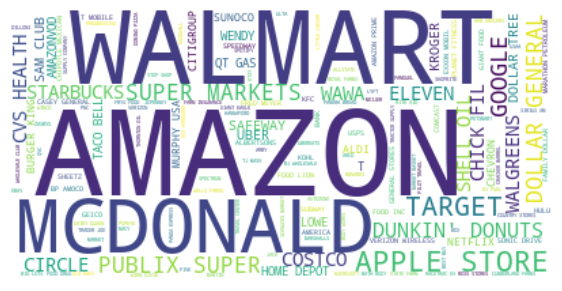

In [15]:
# Copy of the afs merchant names column
df_known_merchs['AFS_PAYMENT_AGENTS'] = df_known_merchs['payment_agent'] 
# Copy of the afs merchant names column
df_known_merchs['AFS_MECHANT_NAMES'] = df_known_merchs['merchant_name']
# Droping original cols
df_known_merchs = df_known_merchs.drop(['txn_desc1', 'txn_desc2','payment_agent','merchant_name'], axis=1)

# Word cloud for more frequent merchant names
word_cloud(df_known_merchs.AFS_MECHANT_NAMES)

In [16]:
df_known_merchs

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES
540097,Td02ed95e75fd3490917c5d5a71dee73d,POS Withdrawal WAL-MART #2142 %%%%% 326 N BROADWAY SALEM NHUS,Unknow Payment Agent,WALMART
90369,T44b24799cb1b3a96b9255ecafaf81a27,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689 %%%%% nan",GOOGLE,GOOGLE
1223549,T9548b715fa0534c59b6770e9f378d9f0,Withdrawal Debit Card %%%%% QT 436 PEORIA AZ Date 06/14/22 ***59822 5541,Unknow Payment Agent,QT GAS
590589,Tb4af4621156037619fd6300cfd431071,Withdrawal #* %%%%% AMAZON.COM*1F6 SEATTLE WA %% Card 15 #9175,Unknow Payment Agent,AMAZON.COM
201132,T0cd4f7178eda3742b396f1223383024d,Withdrawal %%%%% FARMERS INS *1302 EFT PYMT * **445,Unknow Payment Agent,FARMERS INSURANCE GROUP
...,...,...,...,...
238503,Te81e84fa23173ab6a09f4dc8c8162948,COSTCO GAS #1023 KENDALL FLUS %%%%% Withdrawal @ COSTCO GAS #1023 KENDALL FLUS Trace #*98 (eff. date 11/05/2022),Unknow Payment Agent,COSTCO
1114785,T5249b090fdfc3779865a0aa179670558,Withdrawal Signature %%%%% PAYPAL *APPLE.COM/BILL 2211 North First St Date 09/03/22 0 *8454 7 5735 %% Card 15 #4033,PAYPAL,APPLE STORE
433849,T5b116b433d7f3323a12e7dc42ea3de23,POS PURCHASE ON 05/29 @ 17:29 %%%%% GIANT FOOD INC GIANT FOOD INC #23 NOTTINGHAM MD CARD NBR: -4147,Unknow Payment Agent,GIANT FOOD INC
1489136,Tc1c07cc312cc3bdba5020b73eabd2418,Withdrawal #* %%%%% AMAZON PAYMENTS SEATTLE WA %% Card 20 #7638,Unknow Payment Agent,AMAZON.COM


In [17]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

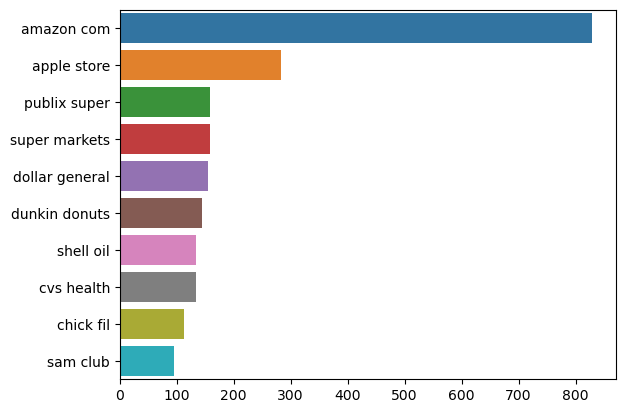

In [18]:
top_n_bigrams=get_top_ngram(df_known_merchs['AFS_MECHANT_NAMES'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x);

In [19]:
def check_names(merchant, t_details):
    
    # Variations for merchant name column
    merchant_1 = merchant
    merchant_2 = merchant_1.lower()
    merchant_3 = re.sub("[\\\\/:*?'#<>|-]", '', merchant_2)
    merchant_4 = re.sub(' ', '', merchant_2)
    merchant_5 = re.sub('[.com/]', ' ', merchant_2)
    merch_list = merchant_1.split() + merchant_2.split() + merchant_3.split() + merchant_4.split() + merchant_5.split() + merchant.split()
    
    # Variations for transaction details column
    t_details_1 = t_details
    t_details_2 = t_details.lower()
    t_details_3 = re.sub("[\\\\/:*?'#<>|-]", '', t_details_2)
    t_details_4 = re.sub("[.com/]", " ",t_details_2)
    t_details_5 = re.sub("[\\\\/:*?'#<>|-]", ' ', t_details_2)
    
    # Merchants mentioned in transaction description w/ variations
    comp_1 = re.sub("Prime", "AMAZONVOD",t_details_1)
    comp_2 = re.sub("VZWRLSS", "VERIZON WIRELESS",t_details_1)
    comp_3 = re.sub("WM", "WALMART",t_details_1)
    
    # Creating a list of conversions to check if merchants are mentioned in transation descriotions 
    details_lis = t_details_2.split()
    details_lis_1 = t_details_1.split() + t_details_2.split() + t_details_3.split() + details_lis + t_details_4.split() + t_details_5.split() + comp_1.split() + comp_2.split() + comp_3.split() + t_details.split()
    
    # Conditions to check if words are in transaction strings
    if (merchant in t_details_3 or t_details_3 in merchant or 
        (merchant_2 in t_details_3 or t_details_3 in merchant_2) or 
        (merchant_3 in t_details_3 or t_details_3 in merchant_3) or
        (merchant_4 in t_details_3 or t_details_3 in merchant_4) or
        (merchant_1 in t_details_3 or t_details_1 in merchant_4) or
        (merchant_1 in details_lis_1 or merchant_4 in details_lis)or
        (any(item in merch_list for item in details_lis_1)) or
        (merchant_1[:4] in t_details_1)):
        return True
    else:
        return False
    

- Checked the occurrence of merchants in the first and secod transation colums separately
- Checked the total number of occurrences per column

In [20]:
# Merchants in the txt_1 or txt_2 columns
df_known_merchs_cp2['txn_desc2'] = df_known_merchs_cp2['txn_desc2'].astype(str)
df_known_merchs_cp2['txn_desc1'] = df_known_merchs_cp2['txn_desc1'].astype(str)
df_known_merchs_cp2['merchant_name'] = df_known_merchs_cp2['merchant_name'].astype(str)
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc1), axis=1) # OR txn_desc2
df_known_merchs_cp2.head(5)

,transaction_id,txn_desc1,txn_desc2,payment_agent,merchant_name,CHECK_MERCH_TRA_cp
540097,Td02ed95e75fd3490917c5d5a71dee73d,POS Withdrawal WAL-MART #2142,326 N BROADWAY SALEM NHUS,Unknow Payment Agent,WALMART,True
90369,T44b24799cb1b3a96b9255ecafaf81a27,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689",nan,GOOGLE,GOOGLE,True
1223549,T9548b715fa0534c59b6770e9f378d9f0,Withdrawal Debit Card,QT 436 PEORIA AZ Date 06/14/22 ***59822 5541,Unknow Payment Agent,QT GAS,False
590589,Tb4af4621156037619fd6300cfd431071,Withdrawal #*,AMAZON.COM*1F6 SEATTLE WA %% Card 15 #9175,Unknow Payment Agent,AMAZON.COM,False
201132,T0cd4f7178eda3742b396f1223383024d,Withdrawal,FARMERS INS *1302 EFT PYMT * **445,Unknow Payment Agent,FARMERS INSURANCE GROUP,False


In [21]:
print('Total of transactions with known merchants:\n',len(df_known_merchs_cp2))

Total of transactions with known merchants:
 10000


In [22]:
print('Merchant name occurrence in txn_desc1 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc1 column:
 4256


In [23]:
df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] = df_known_merchs_cp2.apply(lambda x: check_names(x.merchant_name, x.txn_desc2), axis=1)
print('Merchant name occurrence in txn_desc2 column:\n',(df_known_merchs_cp2['CHECK_MERCH_TRA_cp'] == True).sum())

Merchant name occurrence in txn_desc2 column:
 7040


- Checked occurrence of merchants in concatenated transaction column
- Created CHECK_MERCH_TRA to inspect occurrences
- Checked total number of occurences in merchant details coolumn

In [24]:
# Checking if merchant names are mentioned in the transaction description
df_known_merchs['CHECK_MERCH_TRA'] = df_known_merchs.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.TRANSACTION_DETAILS), axis=1)
df_known_merchs.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
540097,Td02ed95e75fd3490917c5d5a71dee73d,POS Withdrawal WAL-MART #2142 %%%%% 326 N BROADWAY SALEM NHUS,Unknow Payment Agent,WALMART,True
90369,T44b24799cb1b3a96b9255ecafaf81a27,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689 %%%%% nan",GOOGLE,GOOGLE,True
1223549,T9548b715fa0534c59b6770e9f378d9f0,Withdrawal Debit Card %%%%% QT 436 PEORIA AZ Date 06/14/22 ***59822 5541,Unknow Payment Agent,QT GAS,True
590589,Tb4af4621156037619fd6300cfd431071,Withdrawal #* %%%%% AMAZON.COM*1F6 SEATTLE WA %% Card 15 #9175,Unknow Payment Agent,AMAZON.COM,True
201132,T0cd4f7178eda3742b396f1223383024d,Withdrawal %%%%% FARMERS INS *1302 EFT PYMT * **445,Unknow Payment Agent,FARMERS INSURANCE GROUP,True


In [25]:
# Merchant name in the transaction description
print('Merchant name in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == True).sum() )

Merchant name in the transaction description:
 9858


- Created a copy to encode CHECK_MERCH_TRA results
- Created a chart to compare the results
- Created a word cloud of AFS_MECHANT_NAMES to get most frequen merchants
- Checked how many times merchants are mentioned in transaction details
- Checked how many times merchants are not in transaction details
- Created word cloud for merchants not in transaction details 

In [26]:
df_known_merchs_cp = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_PAYMENT_AGENTS','AFS_MECHANT_NAMES','CHECK_MERCH_TRA']].copy(deep=True)
df_known_merchs_cp.head()

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
540097,Td02ed95e75fd3490917c5d5a71dee73d,POS Withdrawal WAL-MART #2142 %%%%% 326 N BROADWAY SALEM NHUS,Unknow Payment Agent,WALMART,True
90369,T44b24799cb1b3a96b9255ecafaf81a27,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689 %%%%% nan",GOOGLE,GOOGLE,True
1223549,T9548b715fa0534c59b6770e9f378d9f0,Withdrawal Debit Card %%%%% QT 436 PEORIA AZ Date 06/14/22 ***59822 5541,Unknow Payment Agent,QT GAS,True
590589,Tb4af4621156037619fd6300cfd431071,Withdrawal #* %%%%% AMAZON.COM*1F6 SEATTLE WA %% Card 15 #9175,Unknow Payment Agent,AMAZON.COM,True
201132,T0cd4f7178eda3742b396f1223383024d,Withdrawal %%%%% FARMERS INS *1302 EFT PYMT * **445,Unknow Payment Agent,FARMERS INSURANCE GROUP,True


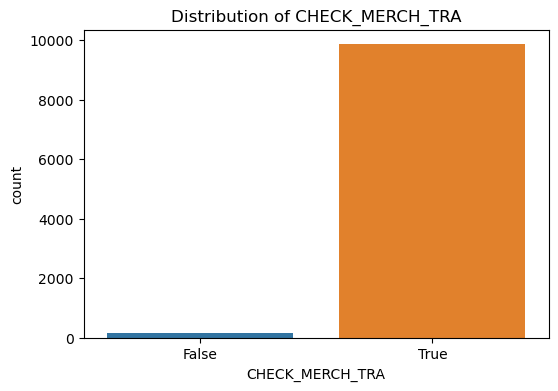

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x="CHECK_MERCH_TRA", data=df_known_merchs_cp)
plt.title("Distribution of CHECK_MERCH_TRA");

In [28]:
print('Percentage of merchant names in T details or not (1/0):\n',(df_known_merchs_cp.CHECK_MERCH_TRA).value_counts(normalize=True).mul(100).round(1).astype(str) + '%');

Percentage of merchant names in T details or not (1/0):
 True     98.6%
False     1.4%
Name: CHECK_MERCH_TRA, dtype: object


In [29]:
# Number of merchant names in transaction details
df_check_true = pd.DataFrame()
df_check_true = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == True]
print('Number of merchant names in transaction details:\n',len(df_check_true))

Number of merchant names in transaction details:
 9858


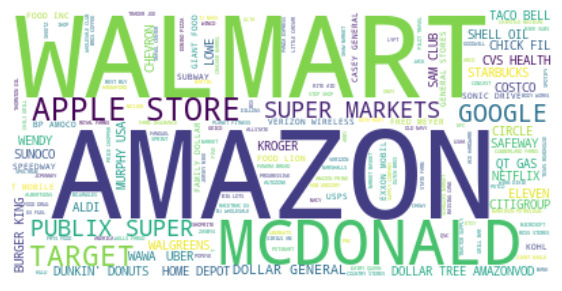

In [30]:
# Word cloud for more frequent merchant names WHEN merchant name is in transaction description

word_cloud(df_check_true.AFS_MECHANT_NAMES)

In [31]:
print('Total number of occurences per merchant name:\n',(df_check_true.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name:
 AMAZON.COM                 8.2%
WALMART                    7.1%
MCDONALD'S                 3.2%
APPLE STORE                2.9%
TARGET                     2.5%
                           ... 
FARM FRESH SUPERMARKETS    0.0%
CHEGG                      0.0%
RUE21                      0.0%
CARRS                      0.0%
TALBOT'S                   0.0%
Name: AFS_MECHANT_NAMES, Length: 651, dtype: object


In [32]:
print('Number of merchant names NOT in the transaction description:\n',(df_known_merchs['CHECK_MERCH_TRA'] == False).sum())

Number of merchant names NOT in the transaction description:
 142


In [33]:
# Number of merchant names not in transaction details
df_check_false = pd.DataFrame()
df_check_false = df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA'] == False]
#print('Number of merchant names NOT in the transaction description:\n', len(df_check_false))

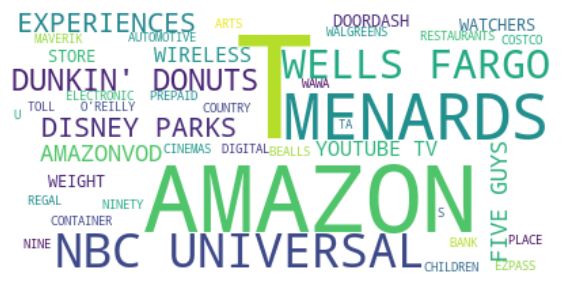

In [34]:
# Word cloud for more frequent merchant names WHEN merchant name is NOT in transaction description
word_cloud(df_check_false.AFS_MECHANT_NAMES)

In [35]:
print('Total number of occurences per merchant name WHEN merchant name is NOT in transation details:\n', (df_check_false.AFS_MECHANT_NAMES).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Total number of occurences per merchant name WHEN merchant name is NOT in transation details:
 AT&T                            35.9%
AMAZON.COM                      11.3%
MENARDS                         10.6%
NBC UNIVERSAL                    5.6%
WELLS FARGO                      4.9%
DUNKIN' DONUTS                   4.9%
DISNEY PARKS AND EXPERIENCES     4.2%
FIVE GUYS                        2.8%
AMAZONVOD                        2.8%
AT&T WIRELESS                    2.1%
YOUTUBE TV                       2.1%
DOORDASH                         1.4%
WEIGHT WATCHERS                  1.4%
THE CHILDREN'S PLACE             0.7%
TA                               0.7%
MAVERIK COUNTRY STORES           0.7%
WALGREENS                        0.7%
ELECTRONIC ARTS - DIGITAL        0.7%
REGAL CINEMAS                    0.7%
O'REILLY AUTOMOTIVE              0.7%
BEALLS                           0.7%
THE CONTAINER STORE              0.7%
NINETY NINE RESTAURANTS          0.7%
COSTCO                         

- Merchant names not mentioned in transaction description

In [36]:
# Merchant names not mentioned in transaction description
df_known_merchs.loc[df_known_merchs['CHECK_MERCH_TRA']==False] 


,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
417389,Tf2e68dbb10cb3b82b08b788ff212bc35,DDA PUR MNRD-MISH %%%%% MNRD-MISH 365 WEST MISHAWAKA IN *,Unknow Payment Agent,MENARDS,False
1118359,T125012b3227b3c2ba4f9d51b884f119b,Withdrawal Bill Payment #* %%%%% Roku for Peacock TV LLC 816-*7 DE %% Card 16 #3855,ROKU,NBC UNIVERSAL,False
1400603,Tf508afdd17413c4eac7498c64334f6ef,ACH Withdrawal %%%%% ATT *1005 Payment * **052,Unknow Payment Agent,AT&T,False
1053932,T2cfe7a93f0eb32f9a4d048e7626319f6,Withdrawal Bill Payment #* %%%%% ATT* BILL PAYMENT 800-331-0500 TX %% Card 15 #8438,Unknow Payment Agent,AT&T,False
1329658,T964f0b4201ea32918a54f88649da6380,POS Withdrawal (FIS) AT+T %%%%% *PAYMENT AT+T *PAYMENT 800-288-2020 FL(0041),Unknow Payment Agent,AT&T,False
...,...,...,...,...,...
275116,T90458708f0a937668761701c98a07ae2,POS Transaction %%%%% ATT* BILL PAYMENT 800-331-0500 TXUS,Unknow Payment Agent,AT&T,False
73421,T900e067831f230b0af678cebd4d5e09e,DBT PURCHASE ON 09/03 @ 19:18 %%%%% COSTCO BY INSTACART HTTPSINSTACAR CA CARD NBR: -6113,INSTACART,DOORDASH,False
787966,T8c927f55841a3d688a756cf204f7455d,POS Withdrawal (FIS) E ZPASS DE %%%%% CSC0 E ZPASS DE CSC00100 888-397-2773 DE(4889),Unknow Payment Agent,EZPASS PREPAID TOLL,False
186545,T7fb48a329d333311b79e674491269d09,5GUYS 0346 QSR MIAMI %%%%% FLUS : POS Transaction,Unknow Payment Agent,FIVE GUYS,False


# Named Entity Recognition
- Created a copy of df_known_merchs for predictions purposes - "df_known_merchs_pred"
- Created the PREDICTIONS column
- Used NER from Spacy
- Applied Entity Ruler to add all the merchants (PATTERNS) from AFS into the model
- Defined function to find patterns from AFS predictions - "def_patterns"
- Defined function to find the organisations in the Transaction details column - "find_org"
- Defined funtion to implement parallel processing = "find_org_parallel"
- Implemented cust NER model and displayed the results

In [37]:
df_known_merchs_pred = df_known_merchs.copy(deep=True)
df_known_merchs_pred['AFS_MECHANT_NAMES'] = df_known_merchs_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_merchs_pred['TRANSACTION_DETAILS']= df_known_merchs_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [38]:
df_known_merchs_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
540097,Td02ed95e75fd3490917c5d5a71dee73d,pos withdrawal wal-mart 2142 %%%%% 326 n broadway salem nhus,Unknow Payment Agent,walmart,True
90369,T44b24799cb1b3a96b9255ecafaf81a27,purchase 03-01 google twitch 650- 0 ca vnt 7689 %%%%% nan,GOOGLE,google,True
1223549,T9548b715fa0534c59b6770e9f378d9f0,withdrawal debit card %%%%% qt 436 peoria az date 06/14/22 59822 5541,Unknow Payment Agent,qt gas,True
590589,Tb4af4621156037619fd6300cfd431071,withdrawal %%%%% amazon.com 1f6 seattle wa %% card 15 9175,Unknow Payment Agent,amazon.com,True
201132,T0cd4f7178eda3742b396f1223383024d,withdrawal %%%%% farmers ins 1302 eft pymt 445,Unknow Payment Agent,farmers insurance group,True
933490,Te10282a240ef36999f1496863b172993,debit card debit %%%%% 12-12-2022 autozone 3827 cumming ga auth,Unknow Payment Agent,autozone,True
470018,Tcc8e6c6540a134dea926735df6e305f9,withdrawal bill payment %%%%% fingerhut fetti payments 13300 pioneer trail eden prairie mn %% card 25 9963 terminal: 01,Unknow Payment Agent,fingerhut,True
467406,T0841daa3c96e356dbc57179a9b73a18c,card purchase %%%%% walgreens store 665 lo 5912 (2023-01-28) rochester ny 99,Unknow Payment Agent,walgreens,True
623061,Tca0decf92d043bd6a18a0758562d75dc,withdrawal bill payment %%%%% amazon.com 1h9rc4ww1 seattle us %% card 25 6693 %% mcc 5942,Unknow Payment Agent,amazon.com,True
243694,Tec237fba6a22357eaf82915266e4eed9,withdrawal %%%%% kroger fuel ctr 13 alpharetta ga date 11/10/22 5542 %% card 35 59861,Unknow Payment Agent,kroger,True


- Function to find and create a list of patterns

In [39]:
def def_patterns(a):

    #Creating a list of patterns - with all the merchant names (with and without spaces, quotes, .com, etc.)

    org =  a #df_known_payment_agents['AFS_MECHANT_NAMES']

    #List of Entities and Patterns
    org_list = org.tolist()

    a = [ x.strip() for x in org_list] # list comprehension - all merchant names from original org_list
    a_space =list(filter(lambda x: ' ' in x, a)) # filtering all names w spaces
    a_nospace = [x.replace(' ', '') for x in a_space] # replacing spaces w ''

    a_quo =list(filter(lambda x: "'" in x, a)) # filtering all names w quotes
    a_noquuo = [x.replace("'", '') for x in a_quo] # replacing quotes w ''

    a_com =list(filter(lambda x: '.com' in x, a)) # filtering all names w .com
    a_nocom = [x.replace('.com', '') for x in a_com] # replacing .com w ''

    a_dash =list(filter(lambda x: '-' in x, a)) # filtering all names w dash
    a_nodash = [x.replace('-', '') for x in a_com] # replacing dash w ''

    new_lis = a + a_nospace + a_nocom + a_noquuo + a_nodash # add instead of dis_list


    # Creating a list of patterns with all the variations from new_lis
    patterns = []
    i = 0
    new_lis = tuple(new_lis)
    for item in new_lis:
        patterns.append({"label": 'ORG', "pattern": [{"LOWER":item}]})
        # patterns.append({"label": 'ORG', "pattern": new_lis[i]})
        i+=1

    # #print(patterns)
    #patterns.append(listb)
    #print(patterns)


    return patterns

In [40]:
patterns = def_patterns(df_known_merchs_pred['AFS_MECHANT_NAMES'])

- Function to find organisations using patterns

In [41]:
# Function to find merchant names in a string - using an NER model with the previously created patterns

def find_org(text:str):
    
    #Build upon the spaCy Model
    NER2 = spacy.load("en_core_web_sm")
    
    #Create the EntityRuler
    ruler = NER2.add_pipe("entity_ruler", config={'validate': True})
     
    ruler.add_patterns(patterns)
    doc_ner = NER2(text)
    
    # useless strings
    junk = ['fip', 'ca(2810','fis','xx4386', '#185','*','hr0d','k50ms3hv','xx9510','xx4710','xx4706','xx0322','he34i8pz0','xx3840','pd1387','ma(9661','ns4qa9xb3 ']
    
    #extract entities
    orgs = []
    for ent in doc_ner.ents:
        if ((ent.label_ == "ORG") and (ent.text not in junk)):
            orgs.append(ent.text)
    orgs = list(set(orgs))
    return ' '.join(orgs) if orgs else 'NA'

- Function for parallel processing

In [42]:
def find_org_parallel(a:dict):
    i=a.copy()
    print(i)
    result = find_org(i['TRANSACTION_DETAILS'])
    i['PREDICTIONS']= result
    print(i)
    return i

In [43]:
df_known_merchs_pred.head(5)

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
540097,Td02ed95e75fd3490917c5d5a71dee73d,pos withdrawal wal-mart 2142 %%%%% 326 n broadway salem nhus,Unknow Payment Agent,walmart,True
90369,T44b24799cb1b3a96b9255ecafaf81a27,purchase 03-01 google twitch 650- 0 ca vnt 7689 %%%%% nan,GOOGLE,google,True
1223549,T9548b715fa0534c59b6770e9f378d9f0,withdrawal debit card %%%%% qt 436 peoria az date 06/14/22 59822 5541,Unknow Payment Agent,qt gas,True
590589,Tb4af4621156037619fd6300cfd431071,withdrawal %%%%% amazon.com 1f6 seattle wa %% card 15 9175,Unknow Payment Agent,amazon.com,True
201132,T0cd4f7178eda3742b396f1223383024d,withdrawal %%%%% farmers ins 1302 eft pymt 445,Unknow Payment Agent,farmers insurance group,True


In [44]:
t_list = df_known_merchs_pred[['transaction_id', 'TRANSACTION_DETAILS', 'AFS_MECHANT_NAMES', 'CHECK_MERCH_TRA']].copy(deep=True).to_dict(orient='records') #replace similarity w unique ID

In [45]:
# df_known_merchs_pred['PREDICTIONS'] = df_known_merchs_pred.TRANSACTION_DETAILS.swifter.apply(find_org)

In [ ]:
par = Parallel(n_jobs=-1)(delayed(find_org_parallel)(i) for i in tqdm(t_list))

In [ ]:
df_known_merchs_pred = pd.DataFrame(par)

- Function to compare results - True/False

In [47]:
def check_names_pred(a, b):
    if ((a in b) or (b in a)):
        return True
    elif (fuzz.ratio(a, b) > 92):
        return True
    else:
        return False

- NER predictions using Spacy and Entity Ruler technique

In [ ]:
df_known_merchs_pred['CHECK_TF'] = df_known_merchs_pred.apply(lambda x: check_names(x.AFS_MECHANT_NAMES, x.PREDICTIONS), axis=1)
df_known_merchs_pred.sample(10)

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df_known_merchs_pred.groupby('CHECK_TF').size().plot(kind='pie', autopct='%.2f', title='Accuracy Percentage', explode=[0.05, 0.05], legend=True, shadow=True)
ax1.set_ylabel('', size=10);


In [ ]:
(df_known_merchs_pred.CHECK_TF).value_counts()

# ML Models - Labelling
- Created different classification models for labelling
    - Multinomial Naive Bayes
    - Linear SVC
    - K-Nearest Neighbors

In [48]:
df_known_class_pred = df_known_merchs[['transaction_id','TRANSACTION_DETAILS','AFS_MECHANT_NAMES']].copy(deep=True)
df_known_class_pred['AFS_MECHANT_NAMES'] = df_known_class_pred['AFS_MECHANT_NAMES'].str.lower()
df_known_class_pred['TRANSACTION_DETAILS']= df_known_class_pred['TRANSACTION_DETAILS'].str.lower().str.replace(r'\s{2,}','').str.replace(r"[,;@#?!&$*]+\ *", " ")

In [49]:
df_known_class_pred.head(10)

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
540097,Td02ed95e75fd3490917c5d5a71dee73d,pos withdrawal wal-mart 2142 %%%%% 326 n broadway salem nhus,walmart
90369,T44b24799cb1b3a96b9255ecafaf81a27,purchase 03-01 google twitch 650- 0 ca vnt 7689 %%%%% nan,google
1223549,T9548b715fa0534c59b6770e9f378d9f0,withdrawal debit card %%%%% qt 436 peoria az date 06/14/22 59822 5541,qt gas
590589,Tb4af4621156037619fd6300cfd431071,withdrawal %%%%% amazon.com 1f6 seattle wa %% card 15 9175,amazon.com
201132,T0cd4f7178eda3742b396f1223383024d,withdrawal %%%%% farmers ins 1302 eft pymt 445,farmers insurance group
933490,Te10282a240ef36999f1496863b172993,debit card debit %%%%% 12-12-2022 autozone 3827 cumming ga auth,autozone
470018,Tcc8e6c6540a134dea926735df6e305f9,withdrawal bill payment %%%%% fingerhut fetti payments 13300 pioneer trail eden prairie mn %% card 25 9963 terminal: 01,fingerhut
467406,T0841daa3c96e356dbc57179a9b73a18c,card purchase %%%%% walgreens store 665 lo 5912 (2023-01-28) rochester ny 99,walgreens
623061,Tca0decf92d043bd6a18a0758562d75dc,withdrawal bill payment %%%%% amazon.com 1h9rc4ww1 seattle us %% card 25 6693 %% mcc 5942,amazon.com
243694,Tec237fba6a22357eaf82915266e4eed9,withdrawal %%%%% kroger fuel ctr 13 alpharetta ga date 11/10/22 5542 %% card 35 59861,kroger


In [50]:
import io

In [51]:
def df_description(clss, a_test,a_pred,a_train,b_train,b_test):     
    #(classifier, y_test, y_pred, y_train,X_train,X_test)
    
    print('Accuracy : {0:0.3f}'.format(accuracy_score(a_test, a_pred)))
    
    #----------
    print('Number of unique merchants in the test set: ', len(a_test.unique()))
    print('Number of unique merchants in the predicted set: ', len(np.unique(a_pred)))
    print('Number of unique merchants in train set: ', len(a_train.unique()))
    print('\nNumber of unique "Transaction Details" rows in test set: ', len(b_train.unique()))
    print('Number of unique "Transaction Details" rows in train set: ', len(b_test.unique()))
    print('\nTotal number of rows in the train set: ', len(b_train))
    print('Total number of rows in the test set', len(b_test))
    
    
    train_acc = accuracy_score(a_train, clss.predict(b_train))
    test_acc = accuracy_score(a_test, a_pred)
    print("Train accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    
    #============================================================
    
    # Get the classification report as a string
    report_dict = metrics.classification_report(a_test, a_pred, zero_division=0, output_dict=True)

    # Convert the report dictionary to a pandas dataframe
    report_data = pd.DataFrame(report_dict).transpose()
    
    precision_count = (report_data['precision'] == 1).sum()
    total_categories = report_data.shape[0]
    precision_percentage = precision_count / total_categories * 100
    
    print('\n===================================\n')
    print('Percentage of best precision', precision_percentage)
    
    recall_count = (report_data['recall'] == 1).sum()
    total_categories = report_data.shape[0]
    recall_percentage = recall_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best recall', recall_percentage)
    
    f1score_count = (report_data['f1-score'] == 1).sum()
    total_categories = report_data.shape[0]
    f1score_percentage = f1score_count / total_categories * 100
    print('===================================\n')
    print('Percentage of best f1score', f1score_percentage)
    
    print('===================================\n')
    
    return
    
    

In [52]:
def c_matrix(a_pred, a_test):

    # count the number of occurrences of each predicted label
    value_counts = Counter(a_pred)

    # sort the labels by descending order of count
    sorted_labels = sorted(value_counts, key=value_counts.get, reverse=True)

    # print the top 10 labels by count
    for label in sorted_labels[:10]:
        print(f"{label}: {value_counts[label]}")
    

    # get the indices of the top 10 predicted values
    top_10_labels = sorted_labels[:10]

    # filter the true and predicted labels to only include the top 10 labels
    top_10_true = [label if label in top_10_labels else "Other" for label in a_test]
    top_10_pred = [label if label in top_10_labels else "Other" for label in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(top_10_true, top_10_pred)

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=top_10_labels, yticklabels=top_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    
    #========================================================================================================================
    

    # sort the labels by ascending order of count
    sorted_labels2 = sorted(value_counts, key=value_counts.get, reverse=False)

    # print the 10 least predicted labels by count
    for label2 in sorted_labels2[:10]:
        print(f"{label2}: {value_counts[label2]}")
    

    # get the indices of the top 10 predicted values
    least_10_labels = sorted_labels2[:10]

    # filter the true and predicted labels to only include the top 10 labels
    least_10_true = [label2 if label2 in least_10_labels else "Other" for label2 in a_test]
    least_10_pred = [label2 if label2 in least_10_labels else "Other" for label2 in a_pred]

    # create the confusion matrix
    cm = confusion_matrix(least_10_true, least_10_pred)

    # plot the confusion matrix
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=least_10_labels, yticklabels=least_10_labels + ["Other"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    
    return

In [53]:
def train(classifier, X, y):

    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)        
    
    # Random over-sampling due to imbalanced classes
    resampler = RandomOverSampler(random_state=0)
    X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train)
    #sns.countplot(x=y_train_oversampled)  
    
    classifier.fit(X_train_oversampled[:, 0], y_train_oversampled)                                                           
    end = time.time()                                                                                
    
    y_pred = classifier.predict(X_test) 
  
  
    df_description(classifier, y_test, y_pred, y_train,X_train,X_test)
    c_matrix(y_pred, y_test)
    
    print('\n\n', metrics.classification_report(y_test, y_pred))
    
    return classifier


In [54]:
df_known_class_pred

,transaction_id,TRANSACTION_DETAILS,AFS_MECHANT_NAMES
540097,Td02ed95e75fd3490917c5d5a71dee73d,pos withdrawal wal-mart 2142 %%%%% 326 n broadway salem nhus,walmart
90369,T44b24799cb1b3a96b9255ecafaf81a27,purchase 03-01 google twitch 650- 0 ca vnt 7689 %%%%% nan,google
1223549,T9548b715fa0534c59b6770e9f378d9f0,withdrawal debit card %%%%% qt 436 peoria az date 06/14/22 59822 5541,qt gas
590589,Tb4af4621156037619fd6300cfd431071,withdrawal %%%%% amazon.com 1f6 seattle wa %% card 15 9175,amazon.com
201132,T0cd4f7178eda3742b396f1223383024d,withdrawal %%%%% farmers ins 1302 eft pymt 445,farmers insurance group
...,...,...,...
238503,Te81e84fa23173ab6a09f4dc8c8162948,costco gas 1023 kendall flus %%%%% withdrawal costco gas 1023 kendall flus trace 98 (eff. date 11/05/2022),costco
1114785,T5249b090fdfc3779865a0aa179670558,withdrawal signature %%%%% paypal apple.com/bill 2211 north first st date 09/03/22 0 8454 7 5735 %% card 15 4033,apple store
433849,T5b116b433d7f3323a12e7dc42ea3de23,pos purchase on 05/29 17:29 %%%%% giant food inc giant food inc 23 nottingham md card nbr: -4147,giant food inc
1489136,Tc1c07cc312cc3bdba5020b73eabd2418,withdrawal %%%%% amazon payments seattle wa %% card 20 7638,amazon.com


- Multinomial Naive Bayes

Accuracy : 0.756
Number of unique merchants in the test set:  348
Number of unique merchants in the predicted set:  309
Number of unique merchants in train set:  617

Number of unique "Transaction Details" rows in test set:  7639
Number of unique "Transaction Details" rows in train set:  1964

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.997625
Test accuracy: 0.7565


Percentage of best precision 26.5

Percentage of best recall 25.75

Percentage of best f1score 15.5

walmart: 165
amazon.com: 155
apple store: 57
mcdonald's: 57
target: 51
shell oil: 34
chick-fil-a: 33
publix super markets: 32
safeway: 32
dunkin' donuts: 31


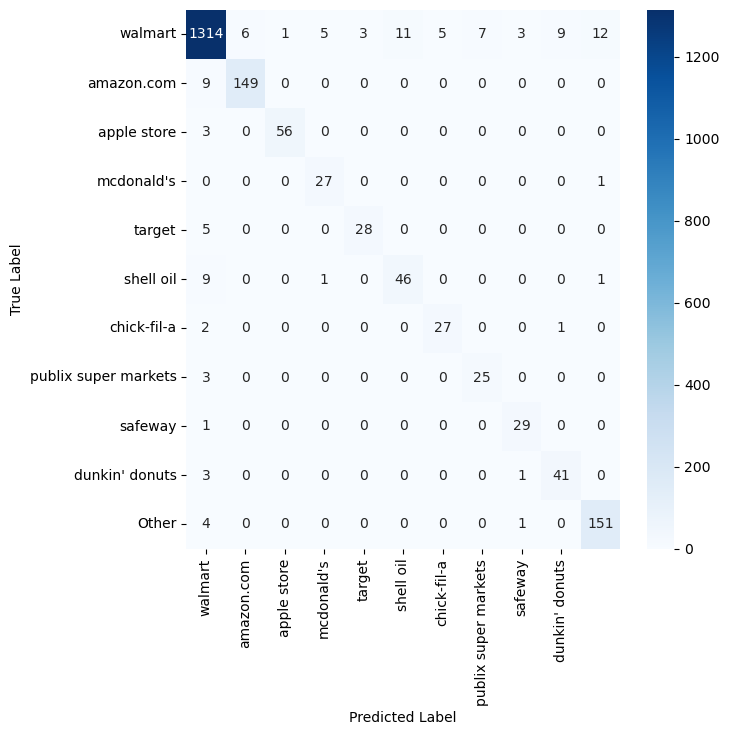

shoppers food warehouse: 1
harkins: 1
vudu: 1
aeropostale: 1
nationwide: 1
vivint: 1
99-cents-only: 1
vons: 1
ikea: 1
caremark pharmacy: 1


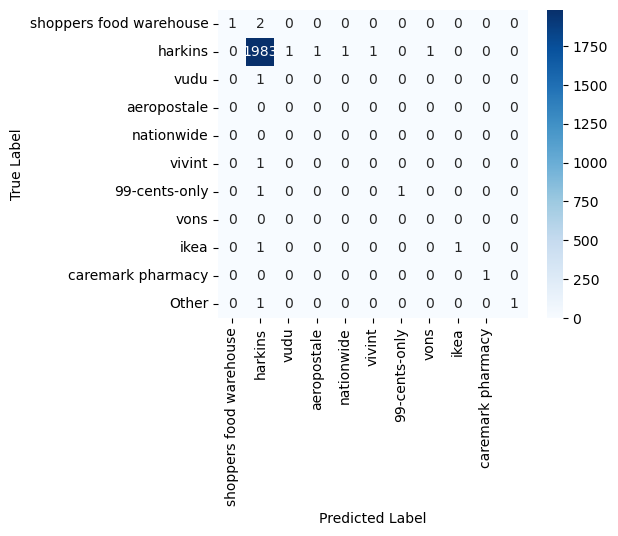



                                     precision    recall  f1-score   support

                          7 eleven       0.76      0.57      0.65        28
                     99-cents-only       1.00      0.33      0.50         3
         academy sports + outdoors       0.00      0.00      0.00         1
                      ace hardware       0.50      0.50      0.50         4
                      acme markets       0.33      0.67      0.44         3
             adt security services       1.00      1.00      1.00         1
                advance auto parts       1.00      0.50      0.67         4
                       aeropostale       0.00      0.00      0.00         1
                        albertsons       0.50      0.40      0.44         5
                              aldi       0.91      0.71      0.80        14
                          allstate       1.00      1.00      1.00         4
                      amazon prime       0.38      0.62      0.48         8
        

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [55]:
classifier1 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
                        ('classifier', MultinomialNB(alpha=0.005))])

train(classifier1, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

MNB = cls_acc
Mtime = cls_time
# print("\n\nMNB: ", MNB)
# print("Time: ", Mtime)



- Linear SVC

Accuracy : 0.952
Number of unique merchants in the test set:  348
Number of unique merchants in the predicted set:  312
Number of unique merchants in train set:  617

Number of unique "Transaction Details" rows in test set:  7639
Number of unique "Transaction Details" rows in train set:  1964

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.999
Test accuracy: 0.9515


Percentage of best precision 65.76086956521739

Percentage of best recall 73.36956521739131

Percentage of best f1score 60.32608695652174

amazon.com: 167
walmart: 157
apple store: 59
mcdonald's: 59
target: 46
dunkin' donuts: 34
publix super markets: 31
google: 31
shell oil: 30
cvs health: 29


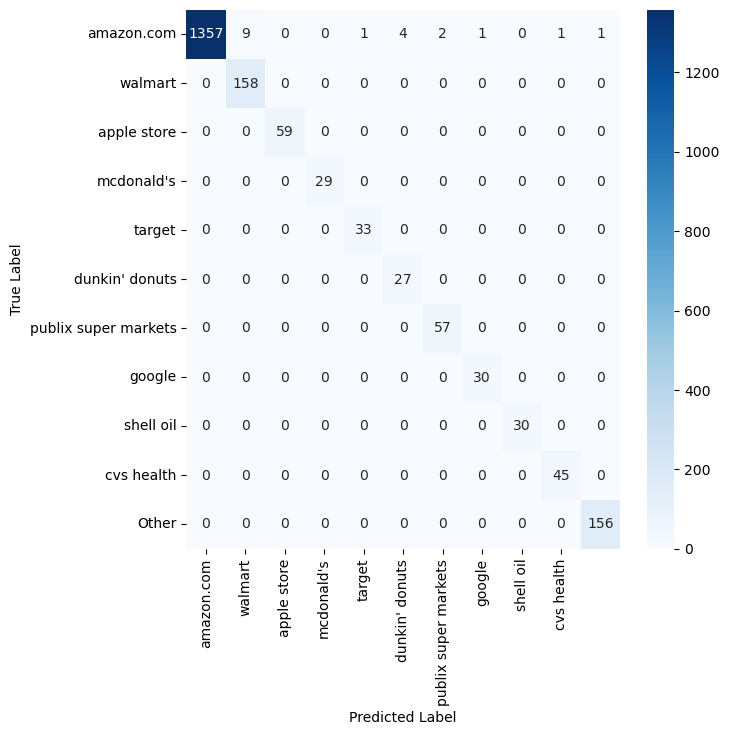

hungry howie's pizza: 1
homegoods: 1
arco: 1
vons: 1
flying j: 1
wegmans food markets: 1
uhaul: 1
cinemark: 1
mta international inc: 1
kwik shop: 1


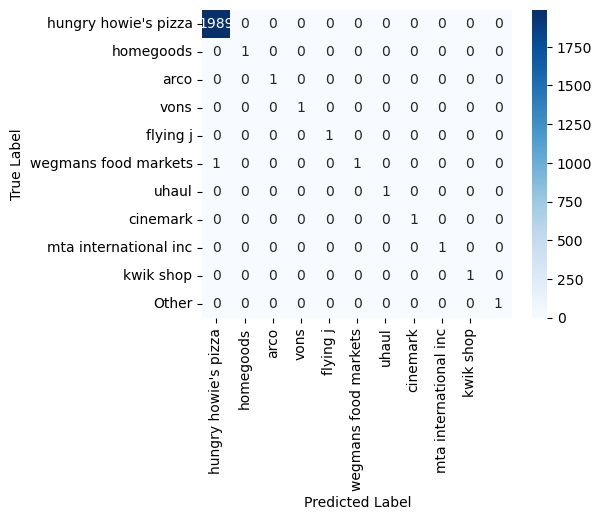



                                precision    recall  f1-score   support

                     7 eleven       1.00      0.96      0.98        28
                99-cents-only       1.00      1.00      1.00         3
    academy sports + outdoors       0.33      1.00      0.50         1
                 ace hardware       0.75      0.75      0.75         4
                 acme markets       1.00      1.00      1.00         3
        adt security services       1.00      1.00      1.00         1
           advance auto parts       1.00      1.00      1.00         4
                  aeropostale       0.00      0.00      0.00         1
                   albertsons       1.00      1.00      1.00         5
                         aldi       1.00      1.00      1.00        14
                     allstate       1.00      1.00      1.00         4
                 amazon prime       1.00      0.50      0.67         8
                   amazon.com       0.95      1.00      0.97       158
  

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [56]:
from sklearn.svm import LinearSVC

classifier2 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
                        ('classifier', LinearSVC(C=10))])

train(classifier2, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

SVC = cls_acc
Stime = cls_time
# print("\n\nSVC: ", SVC)
# print("Time: ", Stime)


- K-Nearest Neighbors

Accuracy : 0.734
Number of unique merchants in the test set:  348
Number of unique merchants in the predicted set:  300
Number of unique merchants in train set:  617

Number of unique "Transaction Details" rows in test set:  7639
Number of unique "Transaction Details" rows in train set:  1964

Total number of rows in the train set:  8000
Total number of rows in the test set 2000
Train accuracy: 0.979625
Test accuracy: 0.734


Percentage of best precision 30.729166666666668

Percentage of best recall 29.166666666666668

Percentage of best f1score 19.010416666666664

amazon.com: 153
walmart: 149
apple store: 56
target: 42
shell oil: 38
dunkin' donuts: 36
mcdonald's: 36
publix super markets: 35
costco: 35
dollar general: 33


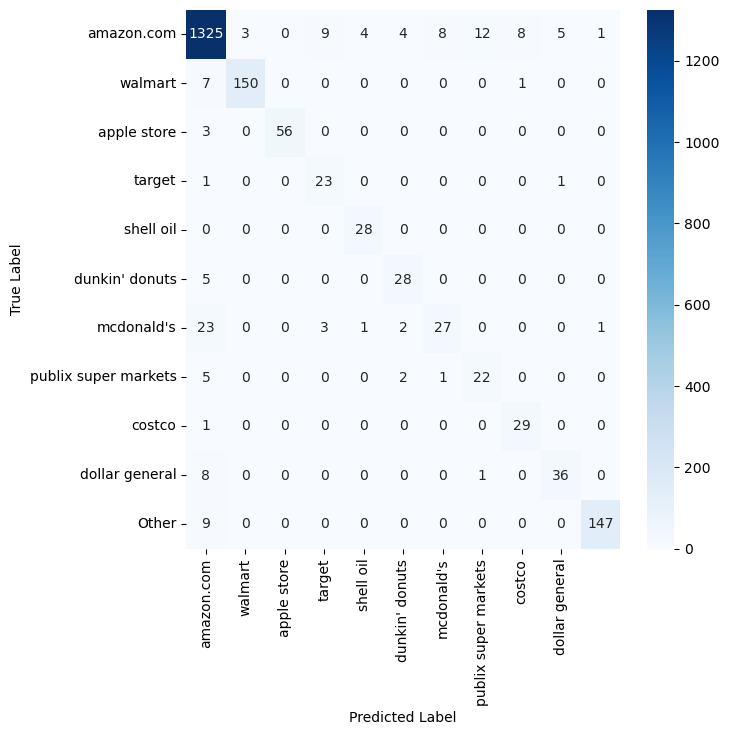

cinnabon: 1
bashas': 1
nationwide: 1
vivint: 1
vons: 1
steam: 1
ingles markets: 1
xbox: 1
uhaul: 1
cinemark: 1


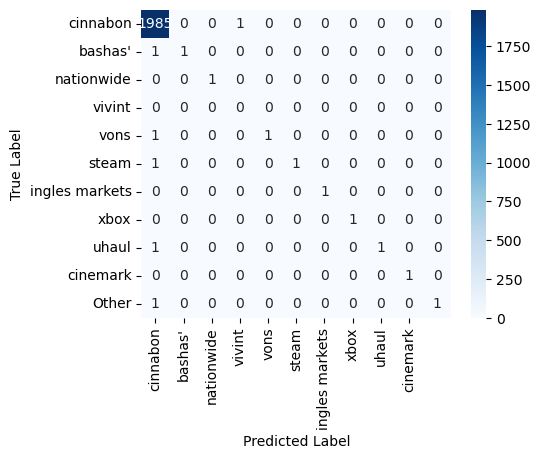



                                precision    recall  f1-score   support

                     7 eleven       0.53      0.57      0.55        28
                99-cents-only       1.00      0.67      0.80         3
    academy sports + outdoors       0.00      0.00      0.00         1
                 ace hardware       0.29      0.50      0.36         4
                 acme markets       0.50      0.67      0.57         3
        adt security services       1.00      1.00      1.00         1
           advance auto parts       1.00      0.75      0.86         4
                  aeropostale       0.00      0.00      0.00         1
                   albertsons       0.50      0.40      0.44         5
                         aldi       0.53      0.57      0.55        14
                     allstate       1.00      1.00      1.00         4
                 amazon prime       0.56      0.62      0.59         8
                   amazon.com       0.98      0.95      0.96       158
  

c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Olimpio.Dasilva\Anaconda

In [57]:
from sklearn.neighbors import KNeighborsClassifier

classifier4 = Pipeline([('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))),
                        ('classifier', KNeighborsClassifier(n_neighbors=5))])

train(classifier4, df_known_class_pred['TRANSACTION_DETAILS'], df_known_class_pred['AFS_MECHANT_NAMES'])

KNN = cls_acc
Ktime = cls_time
print("\n\nKNN: ", KNN)
print("Time: ", Ktime)


# Payment Agents VS Merchant Names
- Selected known payment agents
- Checked number of total occurences per agents
- Checked total number of payment agents
- Checked number of transactions with known payment agents
- Defined a function compare payment agents with merchant names
- Created CHECK_MERCH_AGTS to check when agents and merchants are same
- Checked Totals for different situations

In [58]:
df_known_payment_agents = df_known_merchs.copy(deep=True)
# Known payment agent names
df_known_payment_agents = df_known_payment_agents.loc[df_known_payment_agents['AFS_PAYMENT_AGENTS'] != 'Unknow Payment Agent']
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA
90369,T44b24799cb1b3a96b9255ecafaf81a27,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689 %%%%% nan",GOOGLE,GOOGLE,True
464869,T2b829847189f38afa9e76d7ca97086fb,Withdrawal Debit Card %%%%% DOORDASH*CHIPOTLE WWW.DOORDASH. CA Date 03/11/22 ***84219 5812,DOORDASH,CHIPOTLE MEXICAN,True
412479,T703add73aad335dcb6a090d72dcb86aa,DDA PUR DOORDASH*A %%%%% DOORDASH*APPLEBEES SAN FRANCISCO CA *,DOORDASH,APPLEBEE'S,True
1156934,Tafce5aae56dd3af89157acc5c3b9b9ca,Withdrawal MasterCard DC %%%%% GOOGLE *Peacock 1600 AMPHITHEATRE PKWY 650 Date 02/14/23 5 *102 3 5818,GOOGLE,GOOGLE,True
853226,T2b4625f781f73e0b84140d7d9673ec4c,DOORDASH*CHIPOTLE %%%%% WWW.DOORDASH. CAUS : POS Transaction REF:***94257 PUR DATE:*30,DOORDASH,CHIPOTLE MEXICAN,True
...,...,...,...,...,...
49447,T59ca7be6147d3dbebb3cbcd267bfa8d2,POS Withdrawal GOOGLE %%%%% *SVCSGNS.331g.co/helppay# CAUS,GOOGLE,GOOGLE,True
73421,T900e067831f230b0af678cebd4d5e09e,DBT PURCHASE ON 09/03 @ 19:18 %%%%% COSTCO BY INSTACART HTTPSINSTACAR CA CARD NBR: -6113,INSTACART,DOORDASH,False
23248,Tb2fd05f65c9232f8ac4cec4debac00b5,DDA PUR Roku for D %%%%% Roku for Disney Ele *8107 DE *,ROKU,ROKU,True
1425904,T24bbf4b3d874325eae727de3bd37f1f0,Withdrawal Debit Card %%%%% GOOGLE *discovery plus 855-836-3987 CA Date 01/23/23 ***60596 5734,GOOGLE,GOOGLE,True


In [59]:
print('Number of total occurences per payment agents:\n', (df_known_payment_agents.AFS_PAYMENT_AGENTS).value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Number of total occurences per payment agents:
 GOOGLE             34.4%
PAYPAL             22.3%
DOORDASH           16.1%
SQUARE              7.2%
APPLE CASH          6.9%
ROKU                5.2%
GRUBHUB.COM         3.3%
INSTACART           1.3%
OLO                 1.0%
VENMO               0.7%
PRICELINE           0.7%
LEVELUP             0.7%
SQUARE CASH APP     0.3%
Name: AFS_PAYMENT_AGENTS, dtype: object


In [60]:
print('Total number of payment agents:\n',len(df_known_payment_agents.AFS_PAYMENT_AGENTS.unique()))

Total number of payment agents:
 13


In [61]:
print('Number of transactions with known payment agents:\n',len(df_known_payment_agents))

Number of transactions with known payment agents:
 305


In [62]:
# Function to compare payment agent names with merchant names
def compare_occurences(agent, merchant):
    agent = agent.split()
    merchant = merchant.split()
    # Conditions to check if words are in transaction strings
    if (merchant in agent or agent in merchant or
        (any(item in merchant for item in agent)) or
        (merchant[:3] in agent)):
        return True
    else:
        return False

In [63]:
# Checking if merchant names and payment agents are same
df_known_payment_agents['CHECK_MERCH_AGTS'] = df_known_payment_agents.apply(lambda x: compare_occurences(x.AFS_MECHANT_NAMES, x.AFS_PAYMENT_AGENTS), axis=1)
df_known_payment_agents.head()

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
90369,T44b24799cb1b3a96b9255ecafaf81a27,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689 %%%%% nan",GOOGLE,GOOGLE,True,True
464869,T2b829847189f38afa9e76d7ca97086fb,Withdrawal Debit Card %%%%% DOORDASH*CHIPOTLE WWW.DOORDASH. CA Date 03/11/22 ***84219 5812,DOORDASH,CHIPOTLE MEXICAN,True,False
412479,T703add73aad335dcb6a090d72dcb86aa,DDA PUR DOORDASH*A %%%%% DOORDASH*APPLEBEES SAN FRANCISCO CA *,DOORDASH,APPLEBEE'S,True,False
1156934,Tafce5aae56dd3af89157acc5c3b9b9ca,Withdrawal MasterCard DC %%%%% GOOGLE *Peacock 1600 AMPHITHEATRE PKWY 650 Date 02/14/23 5 *102 3 5818,GOOGLE,GOOGLE,True,True
853226,T2b4625f781f73e0b84140d7d9673ec4c,DOORDASH*CHIPOTLE %%%%% WWW.DOORDASH. CAUS : POS Transaction REF:***94257 PUR DATE:*30,DOORDASH,CHIPOTLE MEXICAN,True,False


- Checked how many times merchant names and payment agents are same
- Checked how many time merchant names and payment agents are different
- Checked total number of transactions with known agents

In [64]:
print('Same merchant names and payment agents:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==True]))

Same merchant names and payment agents:
 134


In [65]:
print('Merchant names and payment agents are diferent:\n',len(df_known_payment_agents.loc[df_known_payment_agents['CHECK_MERCH_AGTS']==False]))

Merchant names and payment agents are diferent:
 171


In [66]:
print('Number of rows with known Agents:\n',len(df_known_payment_agents))

Number of rows with known Agents:
 305


In [67]:
df_known_payment_agents

,transaction_id,TRANSACTION_DETAILS,AFS_PAYMENT_AGENTS,AFS_MECHANT_NAMES,CHECK_MERCH_TRA,CHECK_MERCH_AGTS
90369,T44b24799cb1b3a96b9255ecafaf81a27,"PURCHASE 03-01 Google Twitch 650-*0, CA VNT 7689 %%%%% nan",GOOGLE,GOOGLE,True,True
464869,T2b829847189f38afa9e76d7ca97086fb,Withdrawal Debit Card %%%%% DOORDASH*CHIPOTLE WWW.DOORDASH. CA Date 03/11/22 ***84219 5812,DOORDASH,CHIPOTLE MEXICAN,True,False
412479,T703add73aad335dcb6a090d72dcb86aa,DDA PUR DOORDASH*A %%%%% DOORDASH*APPLEBEES SAN FRANCISCO CA *,DOORDASH,APPLEBEE'S,True,False
1156934,Tafce5aae56dd3af89157acc5c3b9b9ca,Withdrawal MasterCard DC %%%%% GOOGLE *Peacock 1600 AMPHITHEATRE PKWY 650 Date 02/14/23 5 *102 3 5818,GOOGLE,GOOGLE,True,True
853226,T2b4625f781f73e0b84140d7d9673ec4c,DOORDASH*CHIPOTLE %%%%% WWW.DOORDASH. CAUS : POS Transaction REF:***94257 PUR DATE:*30,DOORDASH,CHIPOTLE MEXICAN,True,False
...,...,...,...,...,...,...
49447,T59ca7be6147d3dbebb3cbcd267bfa8d2,POS Withdrawal GOOGLE %%%%% *SVCSGNS.331g.co/helppay# CAUS,GOOGLE,GOOGLE,True,True
73421,T900e067831f230b0af678cebd4d5e09e,DBT PURCHASE ON 09/03 @ 19:18 %%%%% COSTCO BY INSTACART HTTPSINSTACAR CA CARD NBR: -6113,INSTACART,DOORDASH,False,False
23248,Tb2fd05f65c9232f8ac4cec4debac00b5,DDA PUR Roku for D %%%%% Roku for Disney Ele *8107 DE *,ROKU,ROKU,True,True
1425904,T24bbf4b3d874325eae727de3bd37f1f0,Withdrawal Debit Card %%%%% GOOGLE *discovery plus 855-836-3987 CA Date 01/23/23 ***60596 5734,GOOGLE,GOOGLE,True,True
